In [186]:
from model import UNET
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import numpy as np
import cv2
import torchvision


In [180]:
model = UNET(in_channels=3, out_channels=1)
checkpoint = torch.load("my_checkpoint.pth.tar")
#print(checkpoint)
model.load_state_dict(checkpoint['state_dict'])
model.eval()



UNET(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

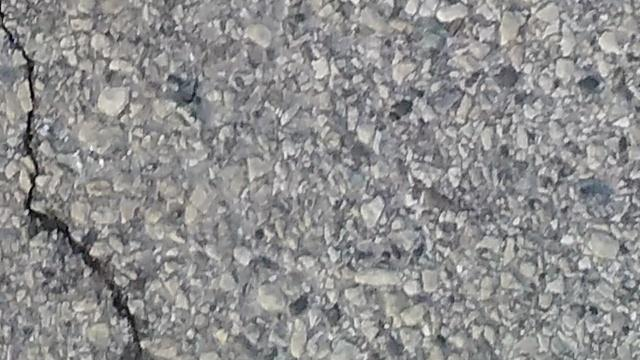

In [193]:
img = Image.open("data/test_images/20160222_163940_1281_721.jpg")
img

In [194]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize((160*2, 240*2)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456, 0.406],
        std=[0.229,0.224,0.225]
    )
])

In [195]:
img = preprocess(img)
img.shape
type(img)

torch.Tensor

In [196]:
img = torch.unsqueeze(img, 0)

In [197]:
p = model(img)


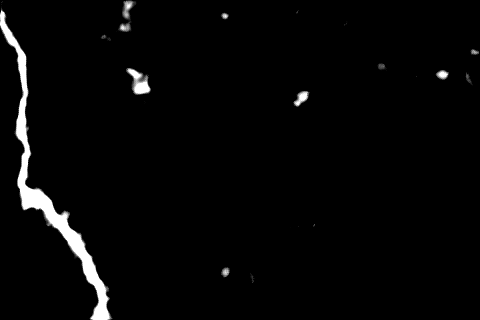

In [199]:
torchvision.utils.save_image(p, "test.png")
im = cv2.imread("test.png")
result = Image.open("test.png")
result
#toimage(image).show()